# Random Projections

We will write functions that will implement randomprojections.

## Python

Python is a popular, powerful, and easy-to-use programming language used in many areas of technology and science these days. we will see some basic usage of python in the following and is highly recommended to learn it completely. 

### Variables, Operators and, Printing

In [1]:
a = 2.5 # assignment
a

2.5

In [2]:
b =  10
b

10

In [3]:
a + b # add

12.5

In [4]:
a*b # multiply

25.0

In [5]:
a**b # power

9536.7431640625

In [6]:
b/a # divide

4.0

In [7]:
h = "hello "
h

'hello '

In [8]:
w = "world"
w

'world'

In [9]:
h + w # string concat

'hello world'

In [10]:
print(f"2+2={2+2}") # print using formated string

2+2=4


In [12]:
name = 'MohammadReza' # type your name here
print(f"hello {name}")

hello MohammadReza


### Condition

In [13]:
a, b = 20, 10 # change values to see the difference

print(f"a={a}, b={b}")

if a>b:
    print("a is greater than b")
elif a==b:
    print("a is equal to b")
else:
    print("b is greater than a")

a=20, b=10
a is greater than b


### Functions

In [14]:
def distance(x1,y1,x2,y2):
    temp = (x1-x2)**2 + (y1-y2)**2
    return temp**(1/2)

In [15]:
distance(1,1,2,2)

1.4142135623730951

### Loop

In [16]:
for i in range(0,5):
    print(i)

0
1
2
3
4


In [17]:
# sum of numbers between 1 and n-1
def cumulative_sum(n):
    z = 0
    for i in range(1,n):
        z+=i
    return z

cumulative_sum(11)

55

In [18]:
i = 1
while i**3 < 500:
    print(i, i**3)
    i+=1

1 1
2 8
3 27
4 64
5 125
6 216
7 343


## Numpy

The fundamental package for scientific computing with Python.

In [19]:
import numpy as np

In [20]:
vec1 = np.array([1,2,3],dtype=np.float32) # creating a vector (matrix, n-dim array) from a given list
vec1

array([1., 2., 3.], dtype=float32)

In [21]:
10 * vec1

array([10., 20., 30.], dtype=float32)

In [22]:
vec2 = np.random.random((3,)) # creating random vector (matrix, n-dim array)
vec2

array([0.22591098, 0.20702474, 0.64055371])

In [23]:
vec1 + vec2

array([1.22591098, 2.20702474, 3.64055371])

In [24]:
np.dot(vec1,vec2) # dot product

2.5616215995685354

Matrix

In [25]:
A = np.array([[1,2],[3,4]],dtype=np.float32)
A

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [26]:
A.T # Transpose of matrix

array([[1., 3.],
       [2., 4.]], dtype=float32)

In [27]:
A * A # element-wise

array([[ 1.,  4.],
       [ 9., 16.]], dtype=float32)

In [28]:
np.dot(A,A)

array([[ 7., 10.],
       [15., 22.]], dtype=float32)

In [29]:
A @ A

array([[ 7., 10.],
       [15., 22.]], dtype=float32)

```np.linalg``` is submodule of numpy implementing important linear algebra formulas

In [30]:
np.linalg.norm(vec1)

3.7416575

In [31]:
np.linalg.norm(A)

5.477226

In [32]:
np.linalg.inv(A) # matrix inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]], dtype=float32)

In [33]:
B = np.diag((1, 2, 3))
B

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [34]:
w, v = np.linalg.eig(B) # Eigen values and Eigen vectors
print(w)
print(v)

[1. 2. 3.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [35]:
A = np.array([[1, 2], [3, 5]])
x = np.array([1, 2])
np.linalg.solve(A, x)

array([-1.,  1.])

In [36]:
C = np.arange(9)
C

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [37]:
C.reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### Warm-up exercise
Define a function that takes two numpy arrays as an input and returns dot product of them. don't use any of the built-in operators of numpy and just do this by multiplying each corresponding element of arrays and then summing them up (loop is needed).

In [38]:
def custom_dot_product(v,u):
    """
    Args:
        v: ndarray of dimension (D,)
        u: ndarray of dimension (D,)
        
    Retruns:
        d: a scalar which is dot product of v and u
    """
    D = v.shape[0]
    d = 0
    for i in range(D):
        d += v[i]*u[i]
    
    return d

In [39]:
# Example test
custom_dot_product(
    np.array([1,2,3]),
    np.array([3,2,1])
)

10

## 1. Orthogonal Projections

Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.

### Projection (1d)


In [40]:
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = (b@b.T) / np.linalg.norm(b)**2

    return P

With the help of the function `projection_matrix_1d`, you should be able 
to implement `project_1d`.

In [41]:
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D,) projection of x in space spanned by b
    """
    p = projection_matrix_1d(b)@x

    return p


### Projection (ND)

In [44]:
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = B@np.linalg.inv(B.T@B)@B.T
    
    return P

In [45]:
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    p = projection_matrix_general(B)@x

    return p

# Project digits images
In this part we load some persian digits data to perform projection to.

In [46]:
load_limit = 100

def load_data(filename):
    fh = open(filename, 'r')
    file_length = len(fh.readlines())
    fh.seek(0, 0)
    data = np.zeros(shape=(min(load_limit, file_length), 1200))
    for i, line in enumerate(fh):
        if i == min(load_limit, file_length):
            break
        a_list = line.split(',')
        map_object = map(int, a_list)
        data[i] = list(map_object)
    fh.close()
    return data

`show_image` will convert (1200, 1) vector into the image

In [47]:
import matplotlib.pyplot as plt
def show_image(vector, save_path='no'):  # the input is a 1 * 1200 vector and should convert to a 40 * 30 image
    vector = vector.reshape(40, 30) * 255
    plt.imshow(vector, cmap='Greys_r', vmin=0, vmax=255)
    if save_path != 'no':
        plt.savefig(save_path)
    plt.show()

first 5 images:

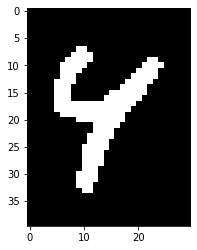

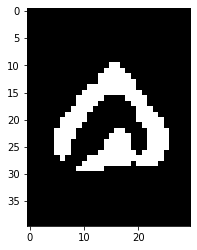

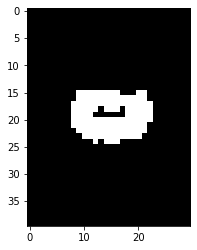

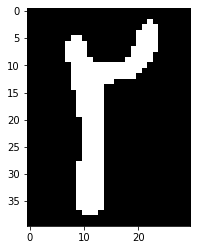

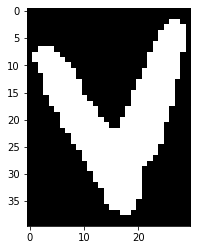

In [48]:
a = load_data("TrainData.txt")
for i in range(5):
    show_image(a[i])

## project to random B
in this part we want to project first 5 images into a random numpy array with shape=(1200, x)

find the minimum of x that images still can be verified

In [ ]:
# YOUR CODE HERE
raise NotImplementedError